In [244]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from tqdm import tqdm
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D

In [245]:
G = 6.67*(10**-11)
mT = 5.9736*(10**24)
rT = 6.3781*(10**6)
mL = 0.07349*(10**24)
radL = 1.7374*(10**6)
d = 3.844*(10**8)
omega = 2.6617*(10**-6)
m = 1000

In [246]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

def deg2rad(ang):
    theta = ang*np.pi/180
    return theta

In [442]:
phi_0 = deg2rad(65.5) 
theta_0 = deg2rad(51)
v0 = 11.452*(10**3)
v0_Vector = [v0*np.cos(theta_0),v0*np.sin(theta_0)]

In [443]:
def rL(r,d,phi,omega,t):
    return np.sqrt((r**2) + (d**2) - 2*r*d*np.cos(phi - omega*t))

In [444]:
pphi0 = rT*v0*np.sin(theta_0 - phi_0)
pr0 =  m*v0

In [445]:
r0 = [rT , phi_0, pr0, pphi0]
r0_n = [rT/d, phi_0, pr0*np.cos(theta_0 - phi_0)/(m*d), pphi0/(m*(d**2))]


In [446]:
def drdt(pr):
    return pr

def dphidt(r, pphi):
    return pphi/(r**2)

def dprdt(r,pphi,phi,t):
    delta = G*mT/(d**3)
    mu = mL/mT
    r_prima = np.sqrt(1 + (r**2) - 2*r*np.cos(phi - omega*t))
    return ((pphi**2)/(r**3)) - delta*((1/r**2) + (mu/(r_prima**3))*(r - np.cos(phi - omega*t)))

def dpphidt(r,phi,t):
    delta = G*mT/(d**3)
    mu = mL/mT
    r_prima = np.sqrt(1 + (r**2) - 2*r*np.cos(phi - omega*t))
    return (-delta*mu*r/(r_prima**3))*np.sin(phi - omega*t)


In [447]:
N = 800000
t = np.linspace(0.,800000.,N)

In [448]:
def GetRK4(f0,f1,f2,f3,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    r = np.zeros(len(t))
    phi = np.zeros(len(t))
    pr = np.zeros(len(t))
    pphi = np.zeros(len(t))
    
    r[0] = r0[0]
    phi[0] = r0[1]
    pr[0] = r0[2]
    pphi[0] = r0[3]
    
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    K3 = np.zeros(4)
    K4 = np.zeros(4)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(pr[i-1]) #r
        K1[1] = f1(r[i-1],pphi[i-1]) #phi
        K1[2] = f2(r[i-1],pphi[i-1],phi[i-1],t[i-1]) #pr  #que pasa con t y el runge kutta
        K1[3] = f3(r[i-1],phi[i-1],t[i-1]) #pphi
        
        K2[0] = f0(pr[i-1] + h*0.5*K1[2])
        K2[1] = f1(r[i-1] + h*0.5*K1[0],pphi[i-1] + 0.5*h*K1[3])
        K2[2] = f2(r[i-1] + h*0.5*K1[0],pphi[i-1] + 0.5*h*K1[3],phi[i-1] + 0.5*h*K1[1],t[i-1])
        K2[3] = f3(r[i-1] + h*0.5*K1[0],phi[i-1] + 0.5*h*K1[1],t[i-1])
        
        K3[0] = f0(pr[i-1] + h*0.5*K2[2])
        K3[1] = f1(r[i-1] + h*0.5*K2[0],pphi[i-1] + 0.5*h*K2[3])
        K3[2] = f2(r[i-1] + h*0.5*K2[0],pphi[i-1] + 0.5*h*K2[3],phi[i-1] + 0.5*h*K2[1],t[i-1])
        K3[3] = f3(r[i-1] + h*0.5*K2[0],phi[i-1] + 0.5*h*K2[1],t[i-1])
        
        K4[0] = f0(pr[i-1] + h*K3[2])
        K4[1] = f1(r[i-1] + h*K3[0],pphi[i-1] + h*K3[3])
        K4[2] = f2(r[i-1] + h*K3[0],pphi[i-1] + h*K3[3],phi[i-1] + h*K3[1],t[i-1])
        K4[3] = f3(r[i-1] + h*K3[0],phi[i-1] + h*K3[1],t[i-1])
        
              
        r[i] = r[i-1] + (h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])/6)
        phi[i] = phi[i-1] + (h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])/6)
        pr[i] = pr[i-1] + (h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])/6)
        pphi[i] = pphi[i-1] + (h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])/6)
        
    return r, phi, pr, pphi

In [449]:
def phi_luna(t):
    return omega*t

In [450]:
r, phi, pr, pphi = GetRK4(drdt,dphidt,dprdt,dpphidt,r0_n,t)
r = r*d
pr = pr*m*d
pphi = pphi*m*(d**2)

In [451]:
def ReduceSize(r,phi,factor):
        
        RrVector = np.array(r[0]) # initial condition
        RphiVector = np.array(phi[0])
        
        for i in range(1,len(r)):
            if i%factor == 0:
                RrVector = np.vstack([RrVector,r[i]])
                RphiVector = np.vstack([RphiVector,phi[i]])
                
        return RrVector, RphiVector
    

def ReduceTime(t,factor):
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,5000)
redr, redphi = ReduceSize(r,phi,5000)

In [452]:
xr, yr = pol2cart(redr, redphi)
xL, yL = pol2cart(d, phi_luna(redt))
#for i in range(len(yr)):
    #print(yr[i],yL[i])

In [453]:
Limits_x = [-(d + d*0.1),d + d*0.1]
Limits_y = [-(np.max(yL) + 0.1*np.max(yL)), np.max(yL) + 0.1*np.max(yL)]

<IPython.core.display.Javascript object>


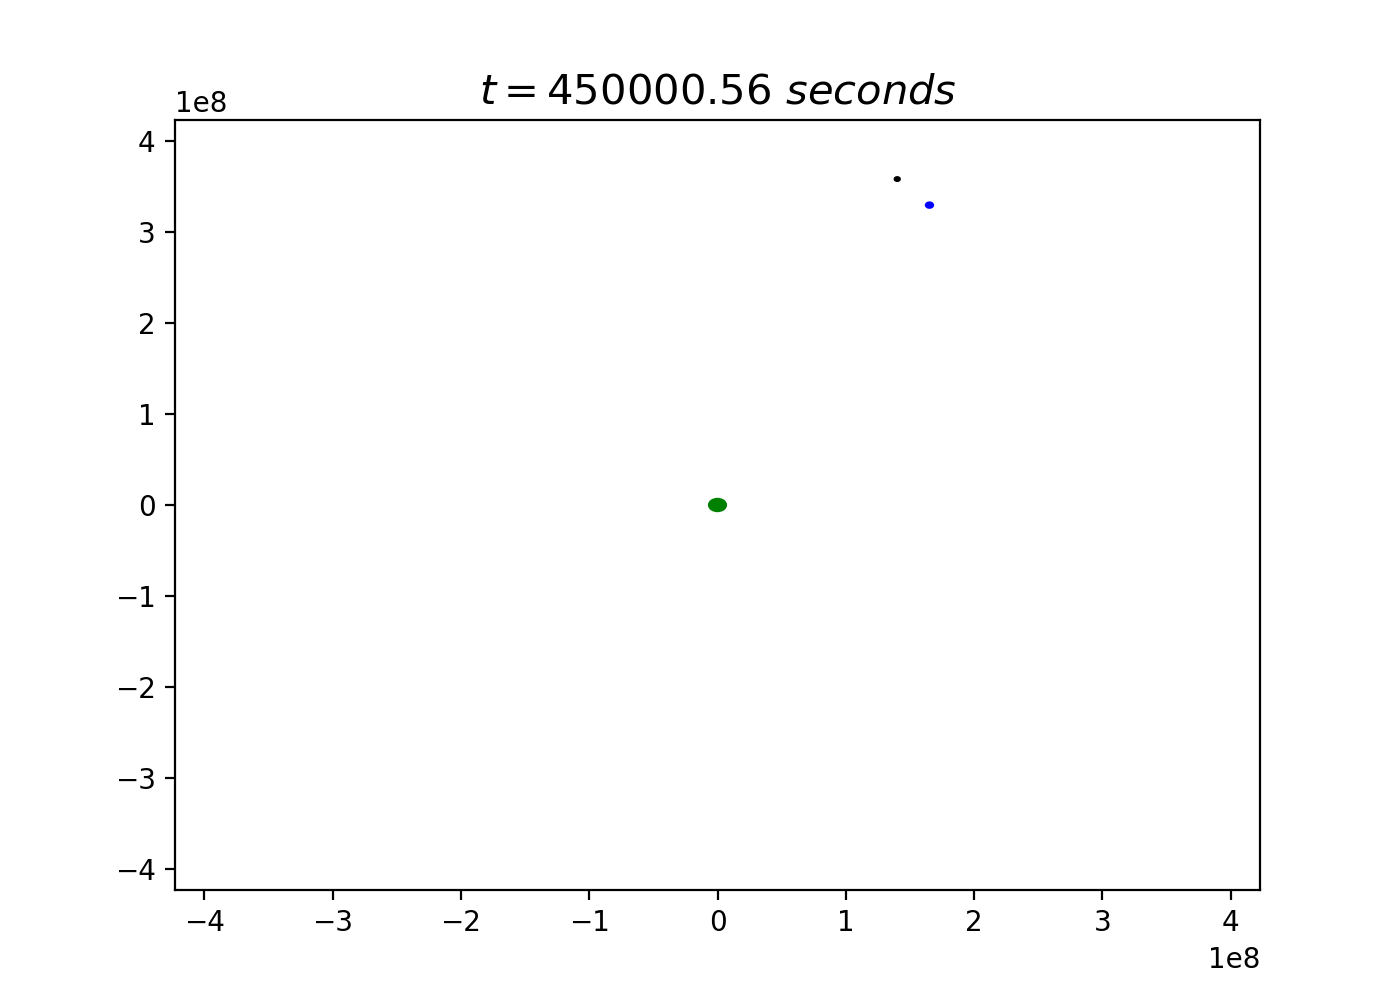

In [456]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(Limits_x[0],Limits_x[1])
    ax.set_ylim(Limits_y[0],Limits_y[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
        
    nave = plt.Circle( (xr[i],yr[i]), rT*0.4, color='b', fill=True)
    Luna = plt.Circle( (xL[i],yL[i]), radL, color='k', fill=True)
    tierra =  plt.Circle( (0,0), rT, color='g', fill=True)
    plot = ax.add_patch(nave)
    plot = ax.add_patch(Luna)
    plot = ax.add_patch(tierra)
    

    return plot


Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=30, metadata=dict(artist='Me'))
Animation.save('Nave.mp4', writer=writer_)
